<font size="6"><strong>Data Scientist Test<strong></font>

This notebook serves as technical test for Data Scientist Intern position at FinAccel. The deadline was in 5 days from the day when the dataset and detailed task were received.

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Background

<div style="text-align: justify">
<em>Don’t judge a book by its cover.</em> It is a common phrase that used when we made a swift wrong judgment on people just by their visible appearance. However, as wise as it sounds, it is rarely used in daily lives because it is a human nature to judge someone by their looks. It is a basic instinct that helps us survive to these days. Can you imagine, seeing an unfamiliar animal with huge fangs and claws, then you thought that it is a docile, herbivore creature? That would be idiotic. The same with people, some features usually represent the majority of the population. The features are so commonly found in that group of people, it became the distinguishing characteristics for them. For example, seeing a man with huge beard, jeans jacket, black sunglasses, riding a <em>Harley</em>, then we can easily say that he is part of a biker gang. When we found it the opposite, it is most likely to be an outlier case.
</div>

<div style="text-align: justify">
There is limit for human when judging something based on its features. With such distinguishing features such as mentioned above, it is easy for us to make a swift correct judgment. But how about features that didn’t have clear visible distinction, like numerical features? Or when it is complex that involves a lot of features? Even if we can make a logically sound decision based on the features, it will take a long time, and it is not very efficient. That’s where machine learning come for the rescue. The advancement of computational technology had solved that problem. Nowadays, we can make a swift, objective decision based on the features, depends on the problem we faced. 
</div>

<div style="text-align: justify">
For this project, figuratively, I will aid the company to make decisions on whether we will give loans to the debtor based on their demographic information using supervised machine learning model. With no prior information on the features, I hypothesized that there are certain features from the dataset given that will distinguish person that will successfully return their loans and person who will not. With such hypothesis, a predictive model is enough to prove it. With good methodology and evaluation, having a good model will indicates there is distinguishing feature(s) used in the model.
</div>

<div style="text-align: justify">
<strong>Note</strong>: Hypothesis and assumptions play a huge role in the process of model building. In this case, if we are interested in which features and how it will distinguish people, then we can’t use non-interpretable models such as boosting, bagging, or deep learning. Another example, with that hypothesis in mind, we will remove multicollinearity in feature selection/engineering process. That’s because we want to know the coefficient of each variables and having a multicollinearity in the model will make the coefficient to be biased. Because the task is about predictive model, then I believe explaining the relationship between variables using model won't be necessary.
</div>

# Dataset Information

<div style="text-align: justify">
This demographic dataset was received through email from HR as technical test for the applied position. Demographic data is a user level data containing all demographic-related data, Facebook data, and several phone-specific data (aggregated to user level). All variables with prefix <em>'de'</em> comes from user's self reported data, prefix <em>'fb'</em> from user's Facebook profile, and <em>'ph'</em> from user's phone data.
</div>

In [363]:
# Load the dataset
df = pd.read_csv("D:/Docs for Job Application/Tes/Finaccel Internship/FinAccel - Data Scientist Test/FinAccel - Data Scientist Test/demographic.csv", low_memory=False)
# Brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41022 entries, 0 to 41021
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   41022 non-null  int64 
 1   flag_bad                41022 non-null  int64 
 2   de_age                  41022 non-null  int64 
 3   de_gender               41022 non-null  int64 
 4   de_date_joined          41022 non-null  object
 5   de_num_friends          41022 non-null  int64 
 6   de_monthly_salary       41022 non-null  int64 
 7   de_employment_type      41022 non-null  int64 
 8   de_employment_duration  41022 non-null  int64 
 9   de_accomodation_type    41022 non-null  int64 
 10  de_education            41022 non-null  int64 
 11  de_marital_status       41022 non-null  int64 
 12  de_children             41022 non-null  int64 
 13  ph_total_contacts       41022 non-null  int64 
 14  ph_other_device_info    41022 non-null  object
 15  ph

<div style="text-align: justify">
Based on the information above, the initial dataset consists of 41022 rows and 22 columns. It also seems that there are missing values in several features.
</div>

## Descriptions of Features

There are some features which had been encoded into numerical values. The details are:
1. flag_bad: 1=bad user, 0=good user.
2. de_gender: 1=male, 2=female.
3. de_employment_type: 1=full time, 2=part-time, 3=business owner.
4. de_education: 1=elementary school, 2=senior high school, 3=diploma, 4=undergraduate, 5=postgraduate.
5. de_marital_status: 1=single, 2=married, 3=divorced, 4=widow/widower.

Other features explanation are:
1. index: unique identifier for each applicant.
2. de_date_joined: time-stamp when user apply.
3. fb_last_update_date: time-stamp when user updated his/her FB profile.

The rest of the variables are self explanatory.

# Data Cleaning

<div style="text-align: justify">
In this step, initial exploration of the dataset was performed. It ultimately aims to identify and treat wrong data type, anomalies, and missing values from the dataset. In this step, feature selection and engineering based on logic will also be done to reduce the number of features that will be explored later.
</div>

## index

Since it is an unique identifier for each data, our main concern with this feature is whether it has duplicate values or not. Let's check.

In [364]:
# Checking for number of unique values of index column
df['index'].nunique() # OK

41022

Since the amount of unique values is the same with the number of rows, this feature has no problem.

## flag_bad

Let's check whether this column has the same unique values as described.

In [365]:
# Checking for unique values of flag_bad column
df['flag_bad'].unique() # OK

array([0, 1], dtype=int64)

## de_age

It is well known that to become a debtor, someone needs to be in a certain range of age based on the term and conditions from the creditor. Thus, our concern with this feature is to identify whether it has data with age outside the range of age mentioned above. For Kredivo, the range is from 18 to 60 years old.

In [366]:
# Checking the characteristics of de_age data
df['de_age'].describe()

count    41022.000000
mean        28.170908
std          6.537795
min         18.000000
25%         23.000000
50%         27.000000
75%         32.000000
max         73.000000
Name: de_age, dtype: float64

Minimum age of the dataset is the same with the regulation. Let's check for the age>60.

In [367]:
# Checking for data (with certain features) with de_age more than 60
df[df['de_age']>60][['flag_bad','de_age','de_gender','de_date_joined']]

,flag_bad,de_age,de_gender,de_date_joined
11228,1,69,1,24/02/2018 15:51
22154,0,61,1,08/07/2018 10:41
23796,0,64,2,23/04/2018 22:09
27387,0,73,1,07/05/2018 16:44
28423,0,63,1,18/05/2018 14:15
34551,1,61,1,03/06/2018 19:27
36118,0,66,2,12/06/2018 08:13
39239,0,62,1,07/07/2018 07:13


There are only 8 columns of data with age more than 60 years old. Because their age are logically sound, let's just say that the data are valid, even if their age is more than the range of age in the rules. It's basically just an assumption.

## de_gender

Let's check whether this column has the same unique values as described.

In [368]:
# Checking for unique values of de_gender column
df['de_gender'].unique() # OK

array([1, 2], dtype=int64)

## de_date_joined

In [369]:
# Checking for column type of de_date_joined
df['de_date_joined'].dtype # 'O' for object

dtype('O')

We need to fix the column type to date and time. First, let's take a look at the initial format of the date and time.

In [370]:
# Checking for inputted data of de_date_joined
df['de_date_joined'][0:10] # DD/MM/YYYY HH:MM

0    08/04/2018 14:50
1    02/01/2018 17:17
2    01/01/2018 16:39
3    04/01/2018 22:36
4    02/01/2018 18:12
5    01/01/2018 12:51
6    06/01/2018 01:05
7    19/01/2018 23:21
8    01/01/2018 12:49
9    01/01/2018 21:31
Name: de_date_joined, dtype: object

In [371]:
# Changing data type into datetime
df['de_date_joined']=pd.to_datetime(df['de_date_joined'])
df['de_date_joined'][0:10] # OK

0   2018-08-04 14:50:00
1   2018-02-01 17:17:00
2   2018-01-01 16:39:00
3   2018-04-01 22:36:00
4   2018-02-01 18:12:00
5   2018-01-01 12:51:00
6   2018-06-01 01:05:00
7   2018-01-19 23:21:00
8   2018-01-01 12:49:00
9   2018-01-01 21:31:00
Name: de_date_joined, dtype: datetime64[ns]

## de_num_friends

In [372]:
# Checking for characteristics of de_num_friends column
df['de_num_friends'].describe()

count    41022.000000
mean      1270.023987
std       1188.849670
min         -1.000000
25%        437.000000
50%        867.000000
75%       1663.000000
max       5000.000000
Name: de_num_friends, dtype: float64

As you can see, there is a -1 value which is an anomaly. Let's check.

In [373]:
df[df['de_num_friends']<0]

,index,flag_bad,de_age,de_gender,de_date_joined,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,...,de_children,ph_total_contacts,ph_other_device_info,ph_call_log_stats,ph_country_code,ph_app_list,fb_gender,fb_dob,fb_last_updated_date,fb_relation
19839,19839,0,22,2,2018-06-04 13:49:00,-1,4000000,1,34,4,...,0,121,"{""device_codename"": ""A37f"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 24.43, ""percent...",id,"['com.whatsapp', 'com.lazada.android', 'com.cv...",NaN,04/16/1991,2018-06-09T07:15:35+0000,NaN
21593,21593,0,28,1,2018-04-22 14:55:00,-1,4000000,2,51,4,...,1,240,"{""device_codename"": ""kenzo"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 3.77, ""percent_...",id,"['com.luutinhit.sensorsforconver', 'com.bukala...",NaN,08/12/1989,2018-09-22T06:36:51+0000,NaN
38700,38700,0,26,2,2018-06-29 09:38:00,-1,6000000,2,15,4,...,1,0,"{""device_codename"": ""prada"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 5.21, ""percent_...",id,"['com.duokan.phone.remotecontroller', 'com.len...",NaN,11/18/1991,2018-01-05T05:56:19+0000,NaN
40791,40791,0,31,1,2018-10-07 13:47:00,-1,3000000,1,31,4,...,0,0,"{""device_codename"": ""riva"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 10.0, ""percent_...",id,"['com.miui.enbbs', 'com.whatsapp', 'com.grabta...",NaN,09/24/1986,2018-08-25T09:45:16+0000,NaN


There are only 4 data with number of friends less than 0. However, before fixing this issue, there are another concerns:
1. The inputted number of friends are absurd. How can someone keep track of their total number of friends? With mean of 1270 and median of 867, it is most unlikely for someone to remember all of their names. The most logical explanation is that these data were received from Facebook, not user's self reported data.
2. Moreover, what's the relevancy of number of friends and the ability of someone to be responsible, keep their promise to pay their debt in the expected time? I don't think there is.

To find more supporting evidence data for concern #2, let's use statistical procedure to furtherly prove it.  
- Null hypothesis (H0): There is no difference in number of friends between bad and good users.  
- Alternative hypothesis (H1): There is difference in number of friends between bad and good users.

In [374]:
from scipy.stats import kstest

In [375]:
# Checking the distribution of number of friends data
kstest(df['de_num_friends'],'norm')

KstestResult(statistic=0.9998781141826337, pvalue=0.0)

Using two-sided Kolmogorov-Smirnov method, the data was not normally distributed with p-value less than 0.05. We will proceed with non-parametric method. Because we are comparing two groups (bad and good), Mann-Whitney U test will be performed.

In [376]:
from scipy.stats import mannwhitneyu

In [377]:
# Performing Mann-Whitney U test
mannwhitneyu(df[(df["flag_bad"]==0)&(df['de_num_friends']>0)]["de_num_friends"],
             df[(df["flag_bad"]==1)&(df['de_num_friends']>0)]["de_num_friends"])

MannwhitneyuResult(statistic=97610454.5, pvalue=0.000976922010809063)

In [378]:
# Checking the distribution of number of friends, stratified by flag_bad
df[df['de_num_friends']>0].groupby(df['flag_bad'])['de_num_friends'].describe()

,count,mean,std,min,25%,50%,75%,max
flag_bad,,,,,,,,
0,35697.0,1270.886825,1182.335360,45.0,444.00,870.0,1659.0,5000.0
1,5320.0,1265.428759,1231.696602,28.0,379.75,845.5,1675.5,5000.0


<AxesSubplot:xlabel='flag_bad', ylabel='de_num_friends'>

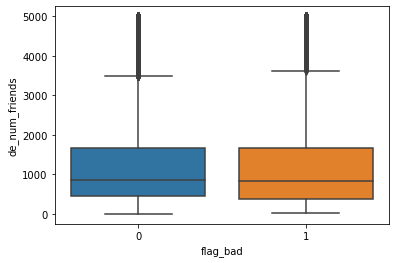

In [379]:
# Creating boxplot for not normally distributed data
sns.boxplot(y='de_num_friends',x='flag_bad',data=df)

Because large sample size used, a small difference in number of friends were resulting in statistically significant difference [[1]](https://stats.stackexchange.com/questions/2516/are-large-data-sets-inappropriate-for-hypothesis-testing). However, even if it was statistically significant, the finding was not meaningful, proven by the table and box-plot above (mean, median, Q1, Q3, min, and max values from both groups were comparable).

With those facts in mind, de_num_friends column will be **dropped**.

In [380]:
# Dropping column
df.drop(columns='de_num_friends',inplace=True)

## de_monthly_salary

In [381]:
# Checking the distribution of monthly salary data
df['de_monthly_salary'].describe()

count    4.102200e+04
mean     5.182707e+06
std      3.751306e+06
min      0.000000e+00
25%      3.000000e+06
50%      4.000000e+06
75%      5.000000e+06
max      4.100000e+07
Name: de_monthly_salary, dtype: float64

Minimum value of monthly salary was 0. Let's check the data.

In [382]:
# Checking data with monthly salary less than its Q1 value
df[df['de_monthly_salary']<3000000]

,index,flag_bad,de_age,de_gender,de_date_joined,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,de_education,...,de_children,ph_total_contacts,ph_other_device_info,ph_call_log_stats,ph_country_code,ph_app_list,fb_gender,fb_dob,fb_last_updated_date,fb_relation
2349,2349,0,32,2,2018-01-16 09:12:00,0,4,0,4,3,...,1,0,"{""device_codename"": ""on7xelte"", ""brand"": ""sams...","{""percent_incoming_nighttime"": 6.12, ""percent_...",id,"['com.vuclip.viu', 'com.quvideo.xiaoying', 'co...",female,02/21/1985,2018-01-12T12:43:52+0000,Married


In [383]:
# Checking data with index 2349
df.iloc[2349]

index                                                                  2349
flag_bad                                                                  0
de_age                                                                   32
de_gender                                                                 2
de_date_joined                                          2018-01-16 09:12:00
de_monthly_salary                                                         0
de_employment_type                                                        4
de_employment_duration                                                    0
de_accomodation_type                                                      4
de_education                                                              3
de_marital_status                                                         2
de_children                                                               1
ph_total_contacts                                                         0
ph_other_dev

As we can see above, this data using employment type 4 which is not exist in the description given. Let's assume that since the user is a married woman, with 0 salary, then she's a housewife, thus unemployed didn't have any employment type input value. However, she is labeled as a good user. How can we measure her ability to pay back the loan? I believe that this is an outlier case and should be removed for modeling purpose.

In [384]:
# Deleting index 2349 of axis 0 (row)
df.drop(index=2349, axis=0, inplace=True)

## de_employment_type

In [385]:
# Checking unique values of employment type
df['de_employment_type'].unique()

array([1, 3, 2, 4], dtype=int64)

In [386]:
# Checking data with employment type=4, which is not exist in the description
df[df['de_employment_type']==4]

,index,flag_bad,de_age,de_gender,de_date_joined,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,de_education,...,de_children,ph_total_contacts,ph_other_device_info,ph_call_log_stats,ph_country_code,ph_app_list,fb_gender,fb_dob,fb_last_updated_date,fb_relation
39390,39390,1,25,1,2018-03-07 03:23:00,3000000,4,24,4,2,...,0,0,"{""device_codename"": ""grandpplte"", ""brand"": ""sa...","{""percent_incoming_nighttime"": 17.39, ""percent...",id,"['com.UCMobile.intl', 'com.mobile.legends', 'c...",NaN,NaN,NaN,NaN


Since there is only one data with employment type 4, it won't hurt to delete this row.

In [387]:
# Deleting data
df.drop(index=39390, axis=0, inplace=True)

## de_employment_duration

In [388]:
# Checking the distribution of employment duration
df['de_employment_duration'].describe()

count    41020.000000
mean        33.438932
std         16.586103
min          1.000000
25%         18.000000
50%         36.000000
75%         51.000000
max         51.000000
Name: de_employment_duration, dtype: float64

No 0 or negative value. It's OK.

## de_accomodation_type

In [389]:
# Checking unique values of accomodation type
df['de_accomodation_type'].unique()

array([4], dtype=int64)

There is only 1 unique value of this column. When everyone has the same feature, we can't distinguish them. So, this feature is unnecessary in predictive model. Let's drop it.

In [390]:
# Deleting column
df.drop(columns='de_accomodation_type',inplace=True)

## de_education

Let's check whether this column has the same unique values as described.

In [391]:
# Checking the unique values of education
df['de_education'].unique() # OK

array([2, 4, 3, 5, 1], dtype=int64)

## de_marital_status

Let's check whether this column has the same unique values as described.

In [392]:
# Checking the unique values of marital status
df['de_marital_status'].unique() # OK

array([2, 1, 3, 4], dtype=int64)

## de_children

Let's see if we have any anomalies with negative value or data with absurd amount of children.

In [393]:
# Checking the distribution of number of children data
df['de_children'].describe()

count    41020.000000
mean         0.706972
std          0.929036
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: de_children, dtype: float64

Seems OK.

## ph_total_contacts

In [394]:
# Checking distribution of number of contacts data
df['ph_total_contacts'].describe()

count    41020.000000
mean       127.038762
std        319.084722
min          0.000000
25%          0.000000
50%          0.000000
75%        144.000000
max      17315.000000
Name: ph_total_contacts, dtype: float64

The same argument with total number of friends, how can this feature help us in the predictive model? I don't think this feature will distinguish people who will able to pay back and who will not. Let's find supporting evidence for this matter.

In [395]:
# Checking the distribution of number of contacts, stratified by flag_bad
df.groupby(df['flag_bad'])['ph_total_contacts'].describe()

,count,mean,std,min,25%,50%,75%,max
flag_bad,,,,,,,,
0,35701.0,127.158847,320.000521,0.0,0.0,0.0,145.0,17315.0
1,5319.0,126.232751,312.896923,0.0,0.0,0.0,137.0,6687.0


With comparable values of mean, Q1, Q2, and Q3, subjectively, there are no difference of number of contacts between good and bad users. Thus, let's **drop** this column.

In [396]:
df.drop(columns='ph_total_contacts',inplace=True)

## ph_other_device_info

In [397]:
df['ph_other_device_info']

0        {"device_codename": "HM2014817", "brand": "Xia...
1            {"device_codename": "A1601", "brand": "OPPO"}
2            {"device_codename": "A1601", "brand": "OPPO"}
3            {"device_codename": "A1601", "brand": "OPPO"}
4             {"device_codename": "1609", "brand": "vivo"}
                               ...                        
41017        {"device_codename": "A1601", "brand": "OPPO"}
41018      {"device_codename": "nikel", "brand": "Xiaomi"}
41019      {"device_codename": "a33g", "brand": "samsung"}
41020    {"device_codename": "santoni", "brand": "Xiaomi"}
41021    {"device_codename": "ugglite", "brand": "xiaomi"}
Name: ph_other_device_info, Length: 41020, dtype: object

Based on columns available, we only have the monthly salary of user that indicates their potential spending power. How about their spending habit? At first, I am planning to drop this feature, because logically, the type of user phone won't affect their ability to pay back their loan. However...

This is quite a stretch, but maybe the codename and brand of user's phone will **indirectly** reflect the spending habit of the user. That's because each phone has its price/value, even if it's not stated directly in the dataset. When comparing this information with user salary, the bigger the differences between the price and salary will reflect the spending habit of the user. For example, for someone with low salary, let's say Rp. 3.000.000,-, to have a Samsung S22+ (Rp. 12.000.000,-) will be too risky/bold. With that spending habit, with not good financial preparation, the user will definitely labeled as bad. But first, let's retrieve information from the feature.

In [398]:
# Checking split and position
df['ph_other_device_info'][0].split('"')

['{', 'device_codename', ': ', 'HM2014817', ', ', 'brand', ': ', 'Xiaomi', '}']

In [399]:
# Retrieving information
device_codename=[]
brand=[]
phone=[]
for i in df['ph_other_device_info']:
    i=i.split('"') # Split string into list
    device_codename.append(i[3].lower())
    brand.append(i[7].lower())

In [400]:
# Creating columns
df['ph_device_codename']=device_codename
df['ph_brand']=brand

In [401]:
# Checking columns
df[['ph_device_codename','ph_brand']][0:5]

,ph_device_codename,ph_brand
0,hm2014817,xiaomi
1,a1601,oppo
2,a1601,oppo
3,a1601,oppo
4,1609,vivo


In [402]:
# Checking number of unique values
df['ph_device_codename'].nunique()

1040

This feature has a high cardinality. Let's use brand instead, to represents them. The assumption is that specific brand is more expensive/cheaper than the other.

In [403]:
# Dropping column
df.drop(columns='ph_device_codename',inplace=True)

In [404]:
# Checking unique values of brand
df['ph_brand'].unique()

array(['xiaomi', 'oppo', 'vivo', 'samsung', 'lge', 'asus', 'lenovo',
       'r50a', 'tcl', 'smartfren', 'motorola', 'sony', 'lava', 'apple',
       'zte', 'docomo', 'evercoss', 'honor', 'infinix', 'huawei',
       'blackberry', 'google', 'polytron', 'coolpad', 'meizu', 'advan',
       'nokia', 'acer', 'axioo', 'wiko', 'sbm', 'ivo', 'doogee', 'm23i',
       'himax', 'luna', 'evercoss-a75l', 'kddi', 'elevate', 'htc', 'at8d',
       'icherry', 'r50b', 'blackview', 'blaupunkt', 'aplus', 'oneplus',
       'sg', 'sgp', 'iris510', 'polytron_l501', 'alps', 'pixel v2+',
       'oukitel', 'hisense', 'zuk', 'evercoss a7b', 'spc', 'mobistel',
       'polymer_x', 'gionee', 'nubia', 'welcome', 's7', 'bluebird',
       'maxtron', 'sharp', 'hp', 'haier', 'umidigi', 'letv', 'cxq',
       'ragentek', 'verizon', 'imo s50', 'nextbit', 'cmcc', 'mito',
       'kata', 'af9900', 'b6s', 'iphone', 'kyocera', 'qcom', 'vodafone',
       'xiaomi nitrogen', 'f6', 'mito a33', 'prince', 'leeco', 'android',
       'ul

There are data of device codename as brand, such as r50a which is type of evercross phone, or evercross a7d. To address with that issue and simplify this feature, I selected several well-known brands: Xiaomi, OPPO, Vivo, Samsung, ASUS, Lenovo, Apple, and Huawei. Other than that, we will classify them as 'Others'.

In [405]:
# Selecting index of Others brand
index=df[~df['ph_brand'].isin(['xiaomi','oppo','vivo','samsung','asus','lenovo','apple','huawei'])].index
# Changing their value to 'Others'
df.loc[index,'ph_brand']='Others'

In [406]:
# Checking the count of each value of brand
df['ph_brand'].value_counts()

xiaomi     13764
samsung     8869
oppo        7474
Others      4020
vivo        2460
asus        2425
lenovo      1484
apple        299
huawei       225
Name: ph_brand, dtype: int64

In [407]:
# Lastly, let's delete ph_other_device_info
df.drop(columns='ph_other_device_info',inplace=True)

## ph_call_log_stats

In [408]:
# Checking the value of this column
df['ph_call_log_stats'][0]

'{"percent_incoming_nighttime": 1.83, "percent_outgoing_daytime": 28.44, "duration_incoming_daytime": 1195, "duration_outgoing_daytime": 1164, "percent_incoming_daytime": 3.67, "percent_other_calls": 2.75, "duration_outgoing_nighttime": 42358, "percent_outgoing_nighttime": 63.3, "total_calls": 109, "duration_incoming_nighttime": 293}'

In [409]:
# Checking the number of missing values
df['ph_call_log_stats'].isna().sum()

2087

I tried to think but didn't find a reasonable statement that will make this feature help us to build the prediction model. Let's **drop** this column.

In [410]:
# Deleting column
df.drop(columns='ph_call_log_stats',inplace=True)

## ph_country_code

In [411]:
# Checking the counts of each unique value of country code
df['ph_country_code'].value_counts()

id    40982
us        3
sg        3
my        2
jp        2
tw        1
kh        1
th        1
Name: ph_country_code, dtype: int64

In [412]:
# Checking number of missing values of the column
df['ph_country_code'].isna().sum()

25

Since majority of the data come from Indonesia, let's drop this feature.

In [413]:
# Deleting column
df.drop(columns='ph_country_code',inplace=True)

## ph_app_list

In [414]:
# Checking apps of good user 1
df[df['flag_bad']==0]['ph_app_list'][0]

"['com.google.android.music', 'com.facebook.orca', 'com.MantisGames.DriftandRallyFREE', 'com.apps.MyXL', 'com.google.android.instantapps.supervisor', 'com.classicpvcmob.bombermanclassic', 'com.miui.player', 'com.grabtaxi.passenger', 'com.google.android.play.games', 'com.google.android.videos', 'com.mi.global.bbs', 'com.xiaomi.ab', 'com.google.android.apps.maps', 'com.google.android.youtube', 'com.mfashiongallery.emag', 'com.touchtype.swiftkey', 'com.swiftkey.swiftkeyconfigurator', 'com.yunwu.fishgame', 'com.whatsapp', 'cn.wps.moffice_eng', 'com.adapps.surahmaryamyusuf.di', 'com.facebook.katana', 'com.google.android.inputmethod.pinyin', 'com.android.browser', 'com.kp.mariberibadah', 'com.uc.browser.en', 'com.google.android.gm', 'com.google.android.setupwizard', 'com.google.android.apps.plus', 'com.ql.android', 'com.finaccel.android', 'com.FaGame.Parking', 'com.google.android.talk', 'com.imo.android.imoim', 'com.kolam.hadiah', 'com.android.vending', 'com.waze', 'com.shopee.id', 'com.swif

In [415]:
# Checking apps of good user 2
df[df['flag_bad']==0]['ph_app_list'][41017]

"['com.instagram.android', 'com.google.android.instantapps.supervisor', 'com.monotype.android.font.pal.hand', 'com.whatsapp', 'com.khaso.alquran.holybook.read.offline', 'app.android.ninestore', 'cn.wps.moffice_eng', 'com.grabtaxi.passenger', 'com.shopee.id', 'vStudio.Android.Camera360', 'com.finaccel.android', 'com.bbm', 'com.tokopedia.tkpd', 'com.gojek.app', 'org.detikcom.rss', 'com.vsco.cam', 'com.r22software.fisheye2', 'org.whiteglow.keepmynotes', 'com.UCMobile.intl', 'com.bca', 'com.google.android.apps.plus', 'com.facebook.katana', 'com.app.tokobagus.betterb', 'com.facebook.orca', 'com.lenovo.anyshare.gps', 'com.atomic.apps.ringtone.cutter']"

In [416]:
# Checking apps of bad user 1
df[df['flag_bad']==1]['ph_app_list'][2]

"['com.tencent.ibg.joox', 'com.mrgames.larvaaction', 'com.gojek.app', 'com.melon.langitmusik', 'com.waze', 'com.facebook.katana', 'com.twitter.android', 'cc.doupai.i18n', 'com.mrgames.larvaheroesfree', 'com.visu.funny.editor.video', 'com.whatsapp', 'com.quvideo.xiaoying', 'com.gojek.driver.car', 'com.boltsuper4g.ioda', 'com.appster.facejjang.plus2', 'com.ubercab', 'com.ubercab.driver', 'com.bca', 'fb.video.downloader', 'tv.hooq.android', 'com.app.tokobagus.betterb', 'com.grabtaxi.passenger', 'org.zwanoo.android.speedtest', 'io.silvrr.installment', 'com.lazada.android', 'com.vshow.me', 'com.steam.photoeditor', 'com.kiloo.subwaysurf', 'com.google.android.apps.translate', 'sg.bigo.live', 'com.melgames.videocompress', 'com.google.android.apps.docs.editors.sheets', 'bestfreelivewallpapers.funny_photo_editor', 'com.google.android.instantapps.supervisor', 'com.finaccel.android', 'com.appster.facejjang', 'com.facebook.orca', 'com.linecorp.b612.android', 'com.vuclip.viu', 'cn.wps.moffice_eng', 

In [417]:
# Checking apps of bad user 2
df[df['flag_bad']==1]['ph_app_list'][40984]

"['com.facebook.orca', 'com.samsung.android.videolist', 'com.telkomsel.telkomselcm', 'com.finaccel.android', 'com.instagram.android', 'com.firsttouchgames.dls3', 'com.lenovo.anyshare.gps', 'cm.aptoide.pt', 'com.lbe.parallel.intl', 'com.google.android.play.games', 'com.lazada.android', 'com.google.android.instantapps.supervisor', 'com.netease.chiji', 'com.duapps.recorder', 'com.samsung.updatecarriermatch', 'com.Yareel', 'com.google.android.apps.translate', 'com.UCMobile.intl', 'br.com.rodrigokolb.realdrum', 'com.whatsapp']"

**Change 1** Amount of Apps.

In [418]:
amount_apps = []
for i in df['ph_app_list']:
    i = i.split(',')
    z = len(i)
    amount_apps.append(z)
df['Amount_Apps']=amount_apps

In [419]:
df.drop(columns=['ph_app_list'], inplace=True)

## fb_gender

In [420]:
# Checking for unique values of the column
df['fb_gender'].unique()

array(['male', 'female', nan], dtype=object)

In [421]:
# Checking for number of missing values
df['fb_gender'].isna().sum()

1512

In [422]:
# Checking for inconsistency 1
df[(df['de_gender']==2)&(df['fb_gender']=='male')]['flag_bad'].value_counts()

0    228
1     75
Name: flag_bad, dtype: int64

In [423]:
# Checking for inconsistency 2
df[(df['de_gender']==1)&(df['fb_gender']=='female')]['flag_bad'].value_counts()

0    371
1     84
Name: flag_bad, dtype: int64

We have 303+455 gender data from FB that didn't match the data manually inputted by user. The question is: "Which one is the right one?", we can't know for sure. Thus, let's believe data which manually inputted by user was the right one, because it's the complete one without missing value.

## fb_dob

I believe that the information from Facebook were only used to crosscheck the data received from the user. So, let's check whether someone was lying about their age.

In [424]:
# Changing data type
df['fb_dob']=pd.to_datetime(df['fb_dob'])

In [425]:
# Creating new df
check=df[['fb_dob','de_age','de_date_joined']]
# Filling NA with random date
index=check[check['fb_dob'].isna()].index
check.loc[index,'fb_dob']='2020-01-01'

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [426]:
# Checking age from the difference of fb_dob and date_joined
a=check['de_date_joined']-check['fb_dob']
a=a.astype('str')
age=[]
for i in a:
    z=i.split(' ')[0]
    z=int(z)
    z=z//365
    age.append(z)
check['check_age']=age

C:\Users\CHINKI~1\AppData\Local\Temp/ipykernel_24256/3198958324.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check['check_age']=age


In [427]:
check[(check['check_age']-check['de_age'])>0]

,fb_dob,de_age,de_date_joined,check_age
1,1995-01-20,22,2018-02-01 17:17:00,23
5,1988-10-17,27,2018-01-01 12:51:00,29
6,1988-04-29,29,2018-06-01 01:05:00,30
12,1985-01-27,32,2018-07-01 09:18:00,33
14,1992-01-20,25,2018-06-02 19:41:00,26
...,...,...,...,...
40998,1996-07-17,21,2018-11-07 17:29:00,22
41013,1925-08-15,21,2018-11-07 18:59:00,93
41014,1971-08-04,46,2018-11-07 22:36:00,47
41019,1995-10-02,22,2018-11-07 23:33:00,23


In [428]:
df['check_age']=check['check_age']

After those exploration, it seems that date of birth from FB is quite absurd. Without further exploration, I conclude that FB is not a good representative data to the user (to be crosschecked with user manual input of data) since a lot of data were wrongly inputted. Let's **drop** them.

In [429]:
df['fb_relation'].unique()

array(['Married', nan, 'In a relationship', 'In an open relationship',
       'Single', 'Engaged', "It's complicated",
       'In a domestic partnership', 'Widowed', 'Separated', 'Divorced',
       'Engaged (Pending)', 'Married (Pending)', 'In a civil union',
       'In an open relationship (Pending)', 'In a relationship (Pending)',
       'In a domestic partnership (Pending)',
       "It's complicated (Pending)"], dtype=object)

de_marital_status: 1=single, 2=married, 3=divorced, 4=widow/widower.

In [430]:
def change_status(x):
    if x=='Married' or x=='In a civil union':
        return 2
    elif x=='Widowed':
        return 4
    elif x=='Divorced':
        return 3
    elif x in ['In a relationship', 'In an open relationship',
       'Single', 'Engaged', "It's complicated",
       'In a domestic partnership', 'Separated',
       'Engaged (Pending)', 'Married (Pending)',
       'In an open relationship (Pending)', 'In a relationship (Pending)',
       'In a domestic partnership (Pending)',
       "It's complicated (Pending)"]:
        return 1
    else:
        return None

In [431]:
df['fb_marital_status']=df['fb_relation'].apply(lambda x: change_status(x))

In [432]:
df['fb_marital_status'].unique()

array([ 2., nan,  1.,  4.,  3.])

In [434]:
df=df.reset_index(drop=True)

**Change 2** Data Inconsistency

In [435]:
df['Inconsistency']=None

In [436]:
df['Inconsistency'].unique()

array([None], dtype=object)

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41020 entries, 0 to 41019
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   41020 non-null  int64         
 1   flag_bad                41020 non-null  int64         
 2   de_age                  41020 non-null  int64         
 3   de_gender               41020 non-null  int64         
 4   de_date_joined          41020 non-null  datetime64[ns]
 5   de_monthly_salary       41020 non-null  int64         
 6   de_employment_type      41020 non-null  int64         
 7   de_employment_duration  41020 non-null  int64         
 8   de_education            41020 non-null  int64         
 9   de_marital_status       41020 non-null  int64         
 10  de_children             41020 non-null  int64         
 11  fb_gender               39508 non-null  object        
 12  fb_dob                  31368 non-null  dateti

In [440]:
for i in range(len(df)):
    if df['de_gender'].iloc[i]==1 and df['fb_gender'].iloc[i]=='female':
        df.loc[i,'Inconsistency']=1
    elif df['de_gender'].iloc[i]==2 and df['fb_gender'].iloc[i]=='male':
        df.loc[i,'Inconsistency']=1
    else:
        df.loc[i,'Inconsistency']=0

In [442]:
for i in range(len(df)): 
    if df['check_age'].iloc[i]-df['de_age'].iloc[i]!=0:
        df.loc[i,'Inconsistency']=1
    else:
        continue

In [444]:
for i in range(len(df)):
    if df['fb_marital_status'].iloc[i]!=df['de_marital_status'].iloc[i]:
        df.loc[i,'Inconsistency']=1
    else:
        continue

In [446]:
# Deleting multiple columns
df.drop(columns=['fb_dob','fb_last_updated_date','fb_relation'],inplace=True)

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41020 entries, 0 to 41019
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   41020 non-null  int64         
 1   flag_bad                41020 non-null  int64         
 2   de_age                  41020 non-null  int64         
 3   de_gender               41020 non-null  int64         
 4   de_date_joined          41020 non-null  datetime64[ns]
 5   de_monthly_salary       41020 non-null  int64         
 6   de_employment_type      41020 non-null  int64         
 7   de_employment_duration  41020 non-null  int64         
 8   de_education            41020 non-null  int64         
 9   de_marital_status       41020 non-null  int64         
 10  de_children             41020 non-null  int64         
 11  fb_gender               39508 non-null  object        
 12  ph_brand                41020 non-null  object

## Summary

1. From the initial data cleaning process, we dropped 10 columns (from 22 columns, to 12) because they were not informative enough to help us in the prediction model. 
2. Other than that, 2 data were deleted (from 41022 to 41020) due to inconsistency with the data description. 
3. An initial feature engineering was performed to simplify information of ph_other_device_info into ph_brand.

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41020 entries, 0 to 41019
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   41020 non-null  int64         
 1   flag_bad                41020 non-null  int64         
 2   de_age                  41020 non-null  int64         
 3   de_gender               41020 non-null  int64         
 4   de_date_joined          41020 non-null  datetime64[ns]
 5   de_monthly_salary       41020 non-null  int64         
 6   de_employment_type      41020 non-null  int64         
 7   de_employment_duration  41020 non-null  int64         
 8   de_education            41020 non-null  int64         
 9   de_marital_status       41020 non-null  int64         
 10  de_children             41020 non-null  int64         
 11  fb_gender               39508 non-null  object        
 12  ph_brand                41020 non-null  object

# Exploratory Data Analysis (EDA)

EDA was performed to help us understand the characteristics of label and features and their correlation to each other. In this step, we can gain insights that will help the business decision-making or strategies, also how to do further feature engineering and/or data preprocessing.

## How many users are bad?

<AxesSubplot:xlabel='flag_bad', ylabel='count'>

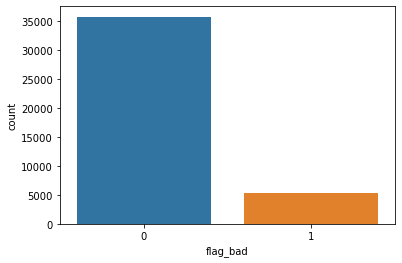

In [70]:
# Barplot of flag_bad
sns.countplot(data=df,x='flag_bad')

In [71]:
# Checking the amount of unique values of flag_bad
df['flag_bad'].value_counts()

0    35701
1     5319
Name: flag_bad, dtype: int64

In [72]:
print('Total of bad users:',(df['flag_bad'].value_counts()[1]))
print('Percentage of bad users:',round(df['flag_bad'].value_counts()[1]/df['flag_bad'].value_counts().sum(),5)*100,'%')

Total of bad users: 5319
Percentage of bad users: 12.967 %


Based on the graph above, the dataset consists of around only 13% of bad users. This is clearly an **imbalanced** dataset. 

## How's the range of age of the users?

<AxesSubplot:ylabel='de_age'>

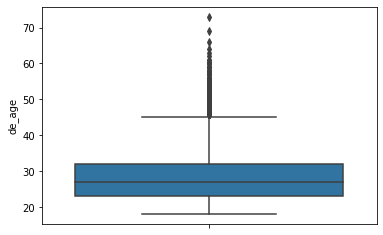

In [73]:
# Creating boxplot
sns.boxplot(y='de_age',data=df)

In [74]:
# Distribution of age
df['de_age'].describe()

count    41020.000000
mean        28.170892
std          6.537908
min         18.000000
25%         23.000000
50%         27.000000
75%         32.000000
max         73.000000
Name: de_age, dtype: float64

Most of the user have range of age from 23 to 32 years old.

## Is there any difference of age between good and bad users?

<AxesSubplot:xlabel='flag_bad', ylabel='de_age'>

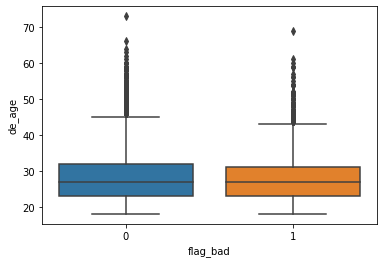

In [75]:
# Creating boxplot
sns.boxplot(y='de_age',x='flag_bad',data=df)

In [76]:
# Distribution of age stratified by flag_bad
df.groupby('flag_bad')['de_age'].describe()

,count,mean,std,min,25%,50%,75%,max
flag_bad,,,,,,,,
0,35701.0,28.208342,6.557939,18.0,23.0,27.0,32.0,73.0
1,5319.0,27.919534,6.396771,18.0,23.0,27.0,31.0,69.0


Based on the graph and table above, there are no difference in age between bad and good users. Based on this data, it seems that increase in age didn't really contributes to the wiseness of someone.

## Does gender affects the ability of someone to return their debt?

<AxesSubplot:xlabel='de_gender', ylabel='count'>

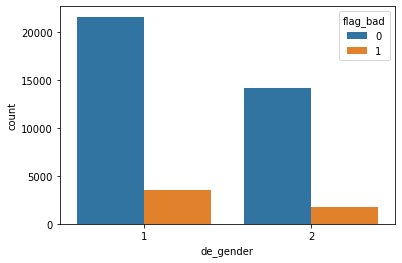

In [77]:
# Visualizing the frequency of gender based on flag_bad
sns.countplot(data=df,x='de_gender',hue='flag_bad')

<AxesSubplot:xlabel='de_gender', ylabel='flag_bad'>

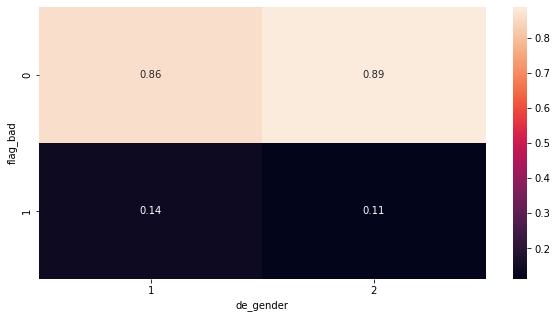

In [78]:
# Heatmap of percentage proportion
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['flag_bad'],df['de_gender'],normalize='columns'), annot=True)

Men have a slightly higher bad users than women, but they are still comparable.

## Is there any difference in monthly salary between bad and good users?

<AxesSubplot:xlabel='flag_bad', ylabel='de_monthly_salary'>

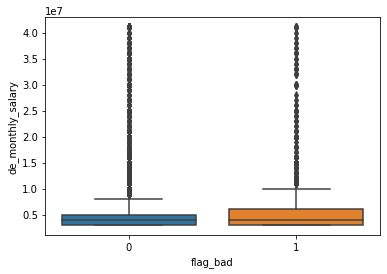

In [79]:
# Creating boxplot
sns.boxplot(y='de_monthly_salary',x='flag_bad',data=df)

In [80]:
# Distribution of monthly salary based on flag_bad
df.groupby('flag_bad')['de_monthly_salary'].describe()

,count,mean,std,min,25%,50%,75%,max
flag_bad,,,,,,,,
0,35701.0,5.176382e+06,3.751453e+06,3000000.0,3000000.0,4000000.0,5000000.0,41000000.0
1,5319.0,5.226546e+06,3.750292e+06,3000000.0,3000000.0,4000000.0,6000000.0,41000000.0


Bad users has slightly more monthly salary than good users, but it's still comparable. 

## Does employment type affects the ability of someone to return their debt?

<AxesSubplot:xlabel='de_employment_type', ylabel='count'>

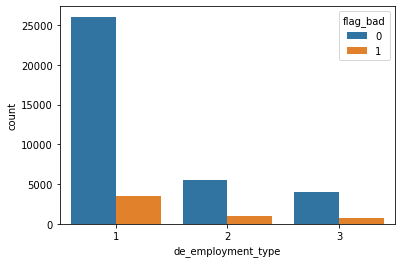

In [81]:
# Visualizing frequencies of employment type based on flag_bad
sns.countplot(data=df,x='de_employment_type',hue='flag_bad')

<AxesSubplot:xlabel='de_employment_type', ylabel='flag_bad'>

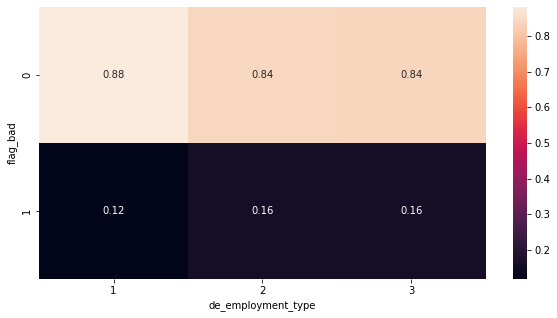

In [82]:
# Heatmap of percentage proportion
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['flag_bad'],df['de_employment_type'],normalize='columns'), annot=True)

Still comparable. However, full time worker have slightly higher good users proportion than part time and business owner.

## Is there any difference in employment duration between good and bad users?

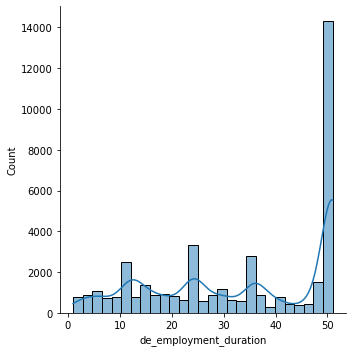

In [83]:
# To see the distribution using histogram
sns.displot(data=df, x="de_employment_duration", kde=True)

It's weird that there are a lot of data with employment duration of 50.

In [84]:
df['flag_bad'].value_counts()

0    35701
1     5319
Name: flag_bad, dtype: int64

In [85]:
df[(df['de_age']<df['de_employment_duration'])]['flag_bad'].value_counts()

0    22385
1     2998
Name: flag_bad, dtype: int64

However, there are a lot of good users data that have age less than employment duration. Maybe the duration is not in years.

<AxesSubplot:xlabel='flag_bad', ylabel='de_employment_duration'>

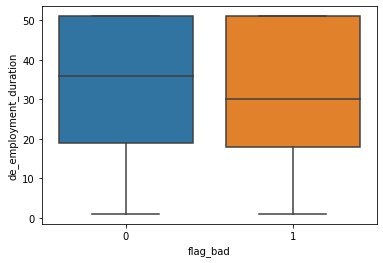

In [86]:
# Creating boxplot
sns.boxplot(y='de_employment_duration',x='flag_bad',data=df)

In [87]:
df.groupby('flag_bad')['de_employment_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
flag_bad,,,,,,,,
0,35701.0,33.728327,16.701789,1.0,19.0,36.0,51.0,51.0
1,5319.0,31.496522,15.651297,1.0,18.0,30.0,51.0,51.0


Good users has slightly higher employment duration than bad users, but still comparable.

## Does education affects the ability of someone to return their debt?

<AxesSubplot:xlabel='de_education', ylabel='count'>

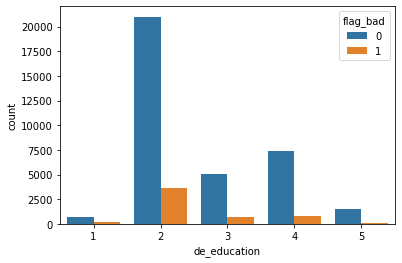

In [88]:
# Visualizing frequencies of education type based on flag_bad
sns.countplot(data=df,x='de_education',hue='flag_bad')

<AxesSubplot:xlabel='de_education', ylabel='flag_bad'>

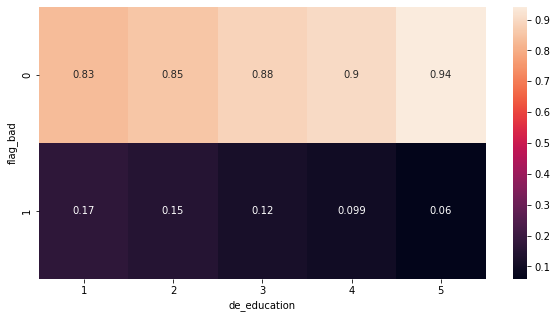

In [89]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['flag_bad'],df['de_education'],normalize='columns'), annot=True)

Now, this is interesting. The higher the education, the less the amount of bad users.

## Does marital status affects the ability of someone to return their debt?

<AxesSubplot:xlabel='de_marital_status', ylabel='count'>

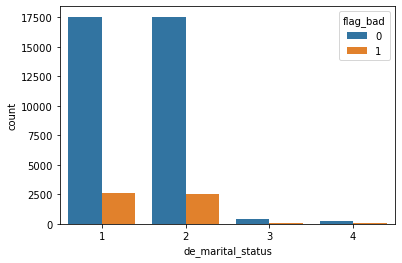

In [90]:
sns.countplot(data=df,x='de_marital_status',hue='flag_bad')

<AxesSubplot:xlabel='de_marital_status', ylabel='flag_bad'>

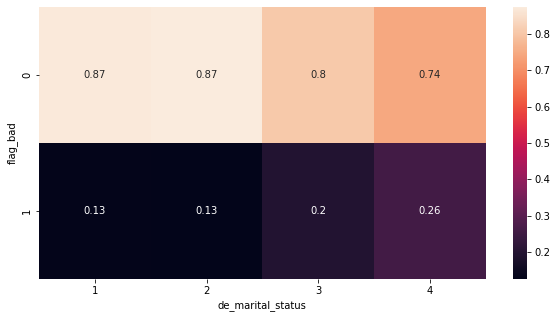

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['flag_bad'],df['de_marital_status'],normalize='columns'), annot=True)

Divorced and widow status has higher proportion of bad users, compared to single and married.

## Does amount of children affect flag_bad status of users?

<AxesSubplot:xlabel='flag_bad', ylabel='de_children'>

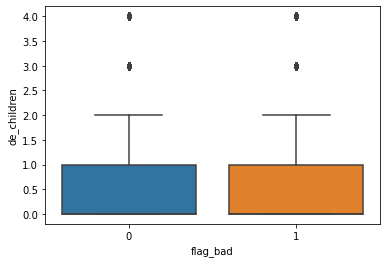

In [92]:
sns.boxplot(y='de_children',x='flag_bad',data=df)

Nope. However, logically, the amount of children will affect their monthly expenditure, it will indirectly affect their ability to pay for their debt.

## Does brand of users handphone reflecting their flag_bad status?

As stated in the data cleaning section, the assumption of the brand will indirectly reflects user's spending habit was made.

<AxesSubplot:xlabel='ph_brand', ylabel='count'>

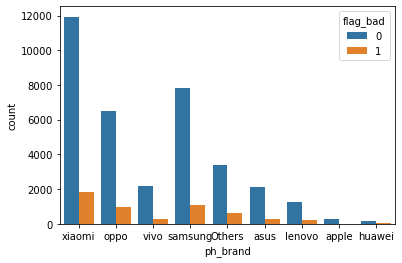

In [93]:
sns.countplot(data=df,x='ph_brand',hue='flag_bad')

<AxesSubplot:xlabel='ph_brand', ylabel='flag_bad'>

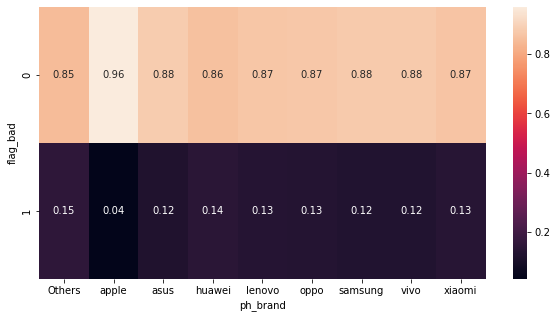

In [94]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['flag_bad'],df['ph_brand'],normalize='columns'), annot=True)

Most of apple users are good users. While others are comparable to each others.

# Evaluation Metrics

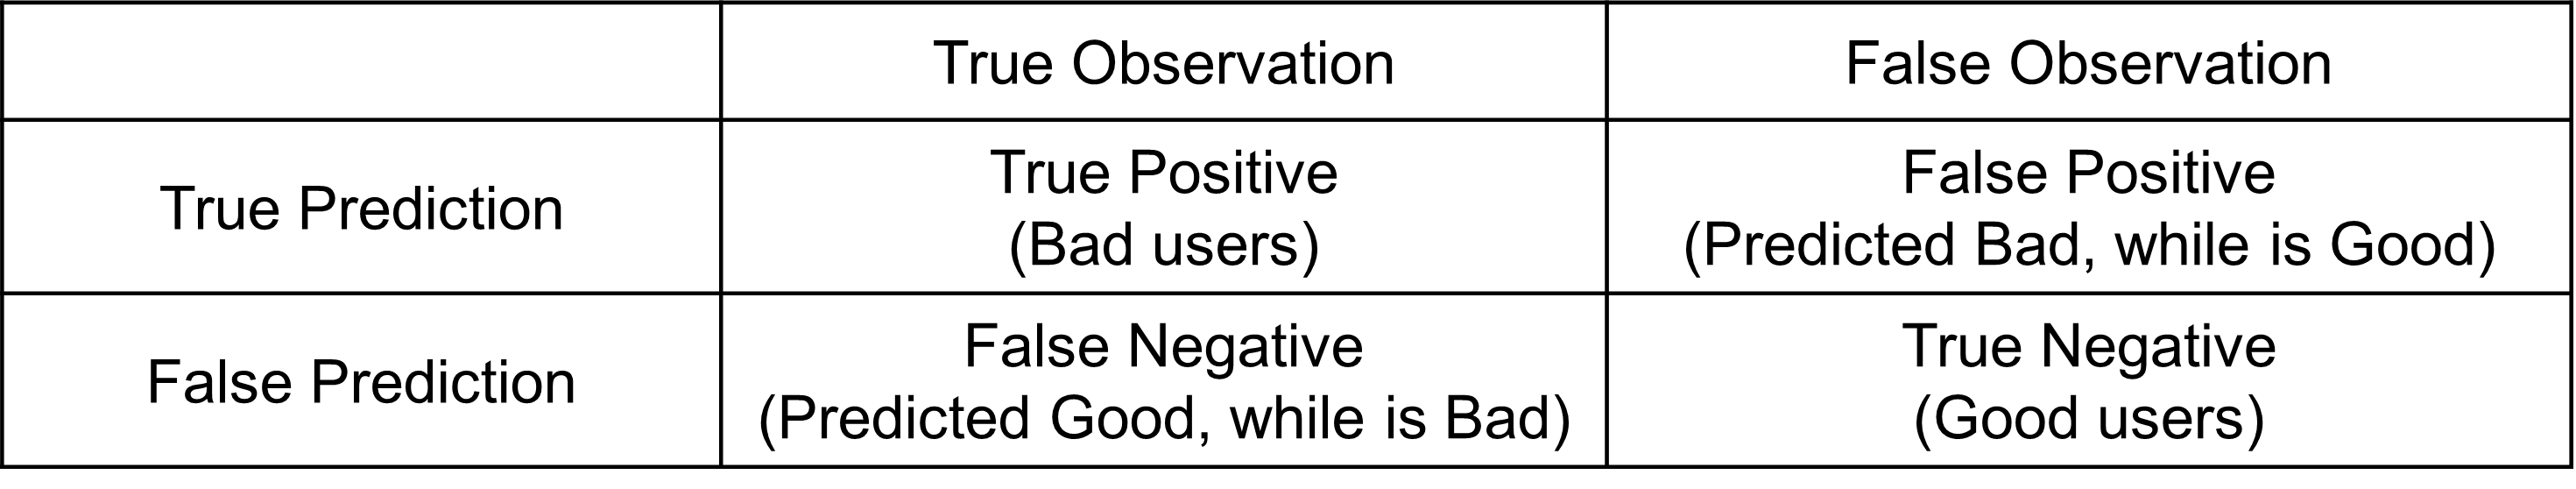

Since the dataset is imbalanced, accuracy won't give us a valid result. Thus, we need to find an alternative evaluation metrics. For this binary classification, we want to focus on positive class and false negative, because the false negative will resulting in loss of money for creditor, because the debtor will not be able to pay (while predicted good). Thus, we will use **recall** to make sure that most of the bad users will be identified.

In [95]:
from sklearn.metrics import SCORERS
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'top_k_accuracy': make_scorer(top_k_accuracy_score, ne

In [530]:
from sklearn.metrics import recall_score, balanced_accuracy_score

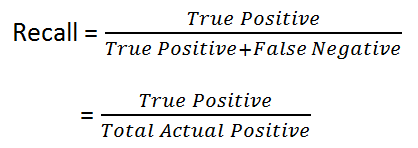

# Splitting Data

In [449]:
from sklearn.model_selection import train_test_split

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41020 entries, 0 to 41019
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   41020 non-null  int64         
 1   flag_bad                41020 non-null  int64         
 2   de_age                  41020 non-null  int64         
 3   de_gender               41020 non-null  int64         
 4   de_date_joined          41020 non-null  datetime64[ns]
 5   de_monthly_salary       41020 non-null  int64         
 6   de_employment_type      41020 non-null  int64         
 7   de_employment_duration  41020 non-null  int64         
 8   de_education            41020 non-null  int64         
 9   de_marital_status       41020 non-null  int64         
 10  de_children             41020 non-null  int64         
 11  fb_gender               39508 non-null  object        
 12  ph_brand                41020 non-null  object

In [497]:
x=df.drop(columns=['flag_bad','index','de_date_joined','fb_gender','check_age','fb_marital_status','Amount_Apps'])
y=df['flag_bad']

In [498]:
x_train, x_test, y_train, y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2020)

# Preprocessing

In [499]:
from sklearn.compose import ColumnTransformer

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

Most of the categorical data had already been transformed into numerical values.

In [500]:
x.describe()

,de_age,de_gender,de_monthly_salary,de_employment_type,de_employment_duration,de_education,de_marital_status,de_children
count,41020.000000,41020.000000,4.102000e+04,41020.000000,41020.000000,41020.000000,41020.000000,41020.000000
mean,28.170892,1.388469,5.182886e+06,1.397050,33.438932,2.636275,1.537860,0.706972
std,6.537908,0.487408,3.751294e+06,0.689242,16.586103,0.950867,0.569083,0.929036
min,18.000000,1.000000,3.000000e+06,1.000000,1.000000,1.000000,1.000000,0.000000
25%,23.000000,1.000000,3.000000e+06,1.000000,18.000000,2.000000,1.000000,0.000000
50%,27.000000,1.000000,4.000000e+06,1.000000,36.000000,2.000000,2.000000,0.000000
75%,32.000000,2.000000,5.000000e+06,2.000000,51.000000,3.000000,2.000000,1.000000
max,73.000000,2.000000,4.100000e+07,3.000000,51.000000,5.000000,4.000000,4.000000


For numerical value, **robust scaler** was used because there are a lot of outliers in the features: de_age, de_monthly_salary, de_employment_duration.

In [501]:
x.describe(include='object')

,ph_brand,Inconsistency
count,41020,41020
unique,9,2
top,xiaomi,1
freq,13764,33040


Because we only have a few columns, let's just **one hot encode** this column (ph_brand).

In [502]:
transformer = ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['ph_brand','Inconsistency']),
    ('robust', RobustScaler(),['de_age','de_monthly_salary','de_employment_duration'])
], remainder = 'passthrough')

# Handling Imbalance Data

Data imbalance will surely affect the model result. Because we focused on bad users, and the amount of bad users are lower than good users, undersampling method will be used [[2]](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/).

In [503]:
from imblearn.under_sampling import NearMiss

In [504]:
from imblearn.over_sampling import SMOTE

In [505]:
nearmiss = NearMiss()

In [506]:
smote=SMOTE()

# Crossvalidation

This procedure will help us in selecting the best classifier to be our predictive model.

## Models

For this binary classification, logistic regression will represents the basic method of model-based classification, K-Nearest Neighbor will represents the instance-based classification, while Random Forest and XGBoost will represents tree-based classification (ensemble model).

In [507]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [508]:
model_logreg = LogisticRegression(random_state=10)
model_knn= KNeighborsClassifier()
model_xgbc= XGBClassifier(random_state=10)
model_forest= RandomForestClassifier(random_state=10)

## Pipeline

Pipeline to prevent data leakage from scaler.

In [509]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline

In [510]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',nearmiss),
    ('model',model_forest)
])

In [511]:
estimator_withoutresampling=Pipeline([
    ('preprocess',transformer),
    ('model',model_forest)
])

In [512]:
hyperparam_space={
    'model':[model_logreg,model_xgbc,model_knn,model_forest]
}

## Withouth Undersampling Method

### Crossval

In [513]:
skfold=StratifiedKFold(n_splits=5)
grid=GridSearchCV(
    estimator_withoutresampling,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='recall',
    n_jobs=-1
)

In [514]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['ph_brand',
                                                                          'Inconsistency']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['de_age',
                                                                          'de_monthly_s

In [515]:
pd.DataFrame(grid.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,{'model': LogisticRegression(random_state=10)},0.000000,0.000000,4
1,"{'model': XGBClassifier(base_score=None, boost...",0.015746,0.005591,3
2,{'model': KNeighborsClassifier()},0.037603,0.003239,1
3,{'model': RandomForestClassifier(random_state=...,0.034313,0.002279,2


Poor training performance.

## With Undersampling Method

### Crossval

In [516]:
skfold=StratifiedKFold(n_splits=5) # 5-fold cross validation for more robust generalization
grid=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

In [517]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['ph_brand',
                                                                          'Inconsistency']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['de_age',
                                                                          'de_monthly_s

In [518]:
pd.DataFrame(grid.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,{'model': LogisticRegression(random_state=10)},0.751351,0.014819,3
1,"{'model': XGBClassifier(base_score=None, boost...",0.802820,0.007221,2
2,{'model': KNeighborsClassifier()},0.737250,0.015741,4
3,{'model': RandomForestClassifier(random_state=...,0.821387,0.009401,1


Using NearMiss Undersampling method, the model was improved by a lot.

### Base Model

We select random forest as the best classifier with the best value of recall score.

In [519]:
best_model=grid.best_estimator_
best_model.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['ph_brand',
                                                   'Inconsistency']),
                                                 ('robust', RobustScaler(),
                                                  ['de_age',
                                                   'de_monthly_salary',
                                                   'de_employment_duration'])])),
                ('resampling', NearMiss()),
                ('model', RandomForestClassifier(random_state=10))])

Let's see its performance in test data.

In [520]:
y_pred=best_model.predict(x_test)
y_proba=best_model.predict_proba(x_test)

In [526]:
y_proba

array([[0.725, 0.275],
       [0.41 , 0.59 ],
       [0.   , 1.   ],
       ...,
       [0.62 , 0.38 ],
       [0.01 , 0.99 ],
       [0.225, 0.775]])

In [521]:
recall_score(y_test,y_pred)

0.7988721804511278

In [522]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.19      0.31      7140
           1       0.13      0.80      0.22      1064

    accuracy                           0.27      8204
   macro avg       0.50      0.49      0.26      8204
weighted avg       0.77      0.27      0.30      8204



# Threshold Optimization

Having around 80% recall won't give us a good model because the precision score is just too low. Let's perform threshold optimization.

In [523]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

In [524]:
from matplotlib import pyplot

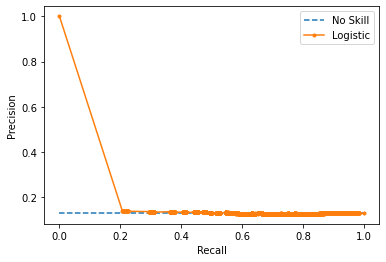

In [525]:
# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# predict probabilities
yhat = best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

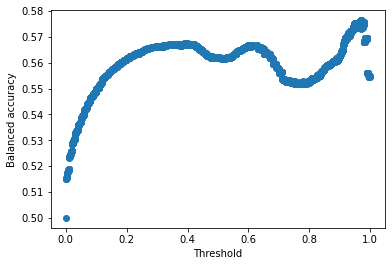

In [531]:
threshold_ = []
accuracy_ = []

for p in np.unique(best_model.predict_proba(x_train)[:,1]):
  threshold_.append(p)
  y_pred = (best_model.predict_proba(x_train)[:,1] >= p).astype(int)
  accuracy_.append(balanced_accuracy_score(y_train,y_pred))

plt.scatter(threshold_,accuracy_)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()